In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tikzplotlib as tpl

In [2]:
from scipy.stats import norm
from scipy.special import gamma as gamma_func
from scipy.integrate import quad
np.random.seed(42)

# Inverse Gamma Distribution

In [64]:
#change the basis, i.e. x -> t(x)

def inv_gamma_pdf(x, a, l):
    r = l**a/gamma_func(a) * (x ** (-a-1)) * (np.exp(-l/x))
    return(r)

def inv_gamma_t_log_pdf(x, a, l):
    c = l**a/gamma_func(a) 
    r = c * (np.exp(x) ** -a) * (np.exp(-l/np.exp(x)))
    return(r)

def inv_gamma_t_sqrt_pdf(x, a, l):
    c = 2*l**a/gamma_func(a)
    r = c * (x ** (-2*a-1)) * (np.exp(-l/x**2))
    return(r)

def inv_gamma_mu(a, l):
    return(l/(a+1))

def inv_gamma_var(a,l):
    return(l**2/(a+1)**3)
    
"""Transforms: log"""

def inv_gamma_t_log_mu(a, l):
    return(np.log(l/a))

def inv_gamma_t_log_var(a):
    return(1/a)

def log_normal_back(x, mu, sigma):
    x_ = np.log(x)
    return(norm.pdf(x_, mu, sigma) * 1/x)

"""Transforms: sqrt"""

def inv_gamma_t_sqrt_mu(a, l):
    return(np.sqrt(l/(a+0.5)))

def inv_gamma_t_sqrt_var(a, l):
    return(l/(4 * (a+0.5)**2))

def sqrt_normal_back(x, mu, sigma):
    x_ = np.sqrt(x)
    return(norm.pdf(x_, mu, sigma) * 0.5 * 1/np.sqrt(x))

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


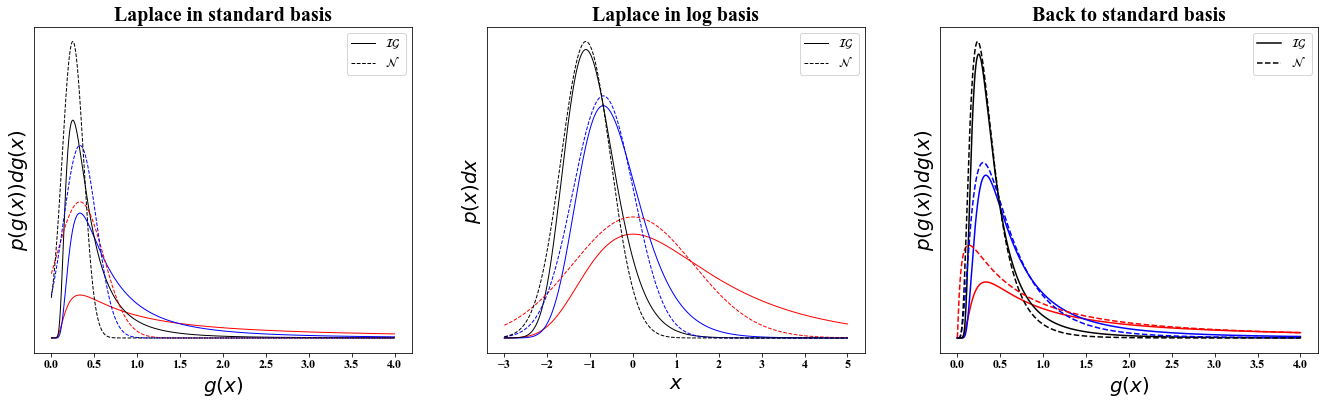

In [65]:
"""values"""

a1, l1 = 0.5,0.5
a2, l2 = 2,1
a3, l3 = 3,1
mode1 = inv_gamma_mu(a1, l1)
mode2 = inv_gamma_mu(a2, l2)
mode3 = inv_gamma_mu(a3, l3)

sigma1 = np.sqrt(inv_gamma_var(a1, l1))
sigma2 = np.sqrt(inv_gamma_var(a2, l2))
sigma3 = np.sqrt(inv_gamma_var(a3, l3))

x = np.linspace(0, 4, 4000 + 1)
x_t = np.linspace(-3, 5, 8000 + 1)
y1 = inv_gamma_pdf(x, a1, l1) 
y2 = inv_gamma_pdf(x, a2, l2) 
y3 = inv_gamma_pdf(x, a3, l3) 
lp_approx1 = norm.pdf(x, loc=mode1, scale=sigma1)
lp_approx2 = norm.pdf(x, loc=mode2, scale=sigma2)
lp_approx3 = norm.pdf(x, loc=mode3, scale=sigma3)

#log basis
y1_t_log = inv_gamma_t_log_pdf(x_t, a1, l1) 
y2_t_log = inv_gamma_t_log_pdf(x_t, a2, l2) 
y3_t_log = inv_gamma_t_log_pdf(x_t, a3, l3) 
mode1_t_log = inv_gamma_t_log_mu(a1, l1)
mode2_t_log = inv_gamma_t_log_mu(a2, l2)
mode3_t_log = inv_gamma_t_log_mu(a3, l3)

sigma1_t_log = np.sqrt(inv_gamma_t_log_var(a1))
sigma2_t_log = np.sqrt(inv_gamma_t_log_var(a2))
sigma3_t_log = np.sqrt(inv_gamma_t_log_var(a3))
lp_approx1_t_log = norm.pdf(x_t, loc=mode1_t_log, scale=sigma1_t_log)
lp_approx2_t_log = norm.pdf(x_t, loc=mode2_t_log, scale=sigma2_t_log)
lp_approx3_t_log = norm.pdf(x_t, loc=mode3_t_log, scale=sigma3_t_log)

#back
y1_back = log_normal_back(x, mode1_t_log, sigma1_t_log) 
y2_back = log_normal_back(x, mode2_t_log, sigma2_t_log) 
y3_back = log_normal_back(x, mode3_t_log, sigma3_t_log) 


"""Plots"""
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams.update({'font.size': 12})

fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(23, 6))
#first plot
axs[0].plot(x, y1, 'r-', lw=1, alpha=1)#, label='inverse gamma')
axs[0].plot(x, y2, 'b-', lw=1, alpha=1)#, label='gamma a2 l2 pdf')
axs[0].plot(x, y3, 'k-', lw=1, alpha=1, label='$\mathcal{IG}$')
axs[0].plot(x, lp_approx1, 'r--', lw=1, alpha=1)#, label='Laplace approx')
axs[0].plot(x, lp_approx2, 'b--', lw=1, alpha=1)#, label='lp approx2 pdf')
axs[0].plot(x, lp_approx3, 'k--', lw=1, alpha=1, label='$\mathcal{N}$')
axs[0].set_yticklabels([])
axs[0].set_yticks([])
axs[0].set_xlabel('$g(x)$', fontsize=20)
axs[0].set_ylabel('$p(g(x))dg(x)$', fontsize=20)
axs[0].set_title('Laplace in standard basis', fontsize=20)
axs[0].legend();

#second plot
axs[1].plot(x_t, y1_t_log, 'r-', lw=1, alpha=1)#, label='inverse gamma trans')
axs[1].plot(x_t, y2_t_log, 'b-', lw=1, alpha=1)#, label='gamma trans a2 l2 pdf')
axs[1].plot(x_t, y3_t_log, 'k-', lw=1, alpha=1, label='$\mathcal{IG}$')
axs[1].plot(x_t, lp_approx1_t_log, 'r--', lw=1, alpha=1)#, label='laplace approx trans')
axs[1].plot(x_t, lp_approx2_t_log, 'b--', lw=1, alpha=1)#, label='lp approx2 trans pdf')
axs[1].plot(x_t, lp_approx3_t_log, 'k--', lw=1, alpha=1, label='$\mathcal{N}$')
axs[1].set_yticklabels([])
axs[1].set_yticks([])
axs[1].set_xlabel('$x$', fontsize=20)
axs[1].set_ylabel('$p(x)dx$', fontsize=20)
axs[1].set_title('Laplace in log basis', fontsize=20)
axs[1].legend();

axs[2].plot(x, y1, 'r-')#, label="inverse gamma");
axs[2].plot(x, y2, 'b-')#, label="exponential");
axs[2].plot(x, y3, 'k-', label="$\mathcal{IG}$");
axs[2].plot(x, y1_back, 'r--')#, label="back transform")
axs[2].plot(x, y2_back, 'b--')#, label="back transform")
axs[2].plot(x, y3_back, 'k--', label="$\mathcal{N}$")
axs[2].set_yticklabels([])
axs[2].set_yticks([])
axs[2].set_xlabel('$g(x)$', fontsize=20)
axs[2].set_ylabel('$p(g(x))dg(x)$', fontsize=20)
axs[2].set_title('Back to standard basis', fontsize=20)
axs[2].legend();

plt.savefig('inverse_gamma_playground_log.pdf')

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in power
  
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: Runtime

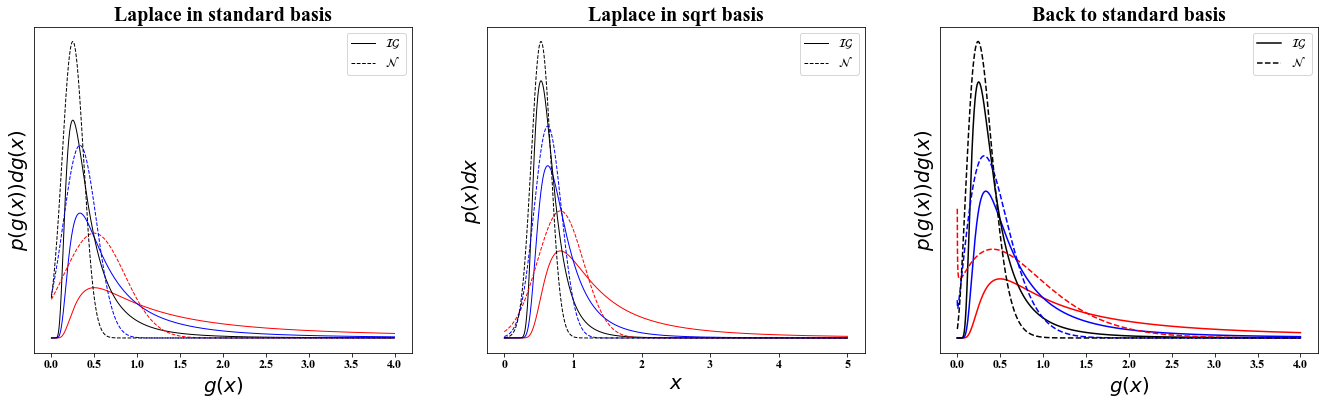

In [66]:
"""values"""

a1, l1 = 1,1
a2, l2 = 2,1
a3, l3 = 3,1
mode1 = inv_gamma_mu(a1, l1)
mode2 = inv_gamma_mu(a2, l2)
mode3 = inv_gamma_mu(a3, l3)

sigma1 = np.sqrt(inv_gamma_var(a1, l1))
sigma2 = np.sqrt(inv_gamma_var(a2, l2))
sigma3 = np.sqrt(inv_gamma_var(a3, l3))

x = np.linspace(0, 4, 4000 + 1)
x_t = np.linspace(0, 5, 8000 + 1)
y1 = inv_gamma_pdf(x, a1, l1) 
y2 = inv_gamma_pdf(x, a2, l2) 
y3 = inv_gamma_pdf(x, a3, l3) 
lp_approx1 = norm.pdf(x, loc=mode1, scale=sigma1)
lp_approx2 = norm.pdf(x, loc=mode2, scale=sigma2)
lp_approx3 = norm.pdf(x, loc=mode3, scale=sigma3)

#sqrt basis
y1_t_sqrt = inv_gamma_t_sqrt_pdf(x_t, a1, l1) 
y2_t_sqrt = inv_gamma_t_sqrt_pdf(x_t, a2, l2) 
y3_t_sqrt = inv_gamma_t_sqrt_pdf(x_t, a3, l3) 
mode1_t_sqrt = inv_gamma_t_sqrt_mu(a1, l1)
mode2_t_sqrt = inv_gamma_t_sqrt_mu(a2, l2)
mode3_t_sqrt = inv_gamma_t_sqrt_mu(a3, l3)

sigma1_t_sqrt = np.sqrt(inv_gamma_t_sqrt_var(a1, l1))
sigma2_t_sqrt = np.sqrt(inv_gamma_t_sqrt_var(a2, l2))
sigma3_t_sqrt = np.sqrt(inv_gamma_t_sqrt_var(a3, l3))
lp_approx1_t_sqrt = norm.pdf(x_t, loc=mode1_t_sqrt, scale=sigma1_t_sqrt)
lp_approx2_t_sqrt = norm.pdf(x_t, loc=mode2_t_sqrt, scale=sigma2_t_sqrt)
lp_approx3_t_sqrt = norm.pdf(x_t, loc=mode3_t_sqrt, scale=sigma3_t_sqrt)

#back
y1_back = sqrt_normal_back(x, mode1_t_sqrt, sigma1_t_sqrt) 
y2_back = sqrt_normal_back(x, mode2_t_sqrt, sigma2_t_sqrt) 
y3_back = sqrt_normal_back(x, mode3_t_sqrt, sigma3_t_sqrt) 


"""Plots"""
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams.update({'font.size': 12})

fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(23, 6))
#first plot
axs[0].plot(x, y1, 'r-', lw=1, alpha=1)#, label='inverse gamma')
axs[0].plot(x, y2, 'b-', lw=1, alpha=1)#, label='gamma a2 l2 pdf')
axs[0].plot(x, y3, 'k-', lw=1, alpha=1, label='$\mathcal{IG}$')
axs[0].plot(x, lp_approx1, 'r--', lw=1, alpha=1)#, label='Laplace approx')
axs[0].plot(x, lp_approx2, 'b--', lw=1, alpha=1)#, label='lp approx2 pdf')
axs[0].plot(x, lp_approx3, 'k--', lw=1, alpha=1, label='$\mathcal{N}$')
axs[0].set_yticklabels([])
axs[0].set_yticks([])
axs[0].set_xlabel('$g(x)$', fontsize=20)
axs[0].set_ylabel('$p(g(x))dg(x)$', fontsize=20)
axs[0].set_title('Laplace in standard basis', fontsize=20)
axs[0].legend();

#second plot
axs[1].plot(x_t, y1_t_sqrt, 'r-', lw=1, alpha=1)#, label='inverse gamma trans')
axs[1].plot(x_t, y2_t_sqrt, 'b-', lw=1, alpha=1)#, label='gamma trans a2 l2 pdf')
axs[1].plot(x_t, y3_t_sqrt, 'k-', lw=1, alpha=1, label='$\mathcal{IG}$')
axs[1].plot(x_t, lp_approx1_t_sqrt, 'r--', lw=1, alpha=1)#, label='laplace approx trans')
axs[1].plot(x_t, lp_approx2_t_sqrt, 'b--', lw=1, alpha=1)#, label='lp approx2 trans pdf')
axs[1].plot(x_t, lp_approx3_t_sqrt, 'k--', lw=1, alpha=1, label='$\mathcal{N}$')
axs[1].set_yticklabels([])
axs[1].set_yticks([])
axs[1].set_xlabel('$x$', fontsize=20)
axs[1].set_ylabel('$p(x)dx$', fontsize=20)
axs[1].set_title('Laplace in sqrt basis', fontsize=20)
axs[1].legend();

axs[2].plot(x, y1, 'r-')#, label="inverse gamma");
axs[2].plot(x, y2, 'b-')#, label="exponential");
axs[2].plot(x, y3, 'k-', label="$\mathcal{IG}$");
axs[2].plot(x, y1_back, 'r--')#, label="back transform")
axs[2].plot(x, y2_back, 'b--')#, label="back transform")
axs[2].plot(x, y3_back, 'k--', label="$\mathcal{N}$")
axs[2].set_yticklabels([])
axs[2].set_yticks([])
axs[2].set_xlabel('$g(x)$', fontsize=20)
axs[2].set_ylabel('$p(g(x))dg(x)$', fontsize=20)
axs[2].set_title('Back to standard basis', fontsize=20)
axs[2].legend();

plt.savefig('inverse_gamma_playground_sqrt.pdf')

# Verify the Bridges

In [67]:
#verify the log bridge

def inv_gamma_t_log_lambda(m,s): 
    return(np.exp(m)/s**2)

def inv_gamma_t_log_alpha(s):
    return(1/s**2)
    

test_a1, test_l1 = 3,4
test_m1, test_s1 = inv_gamma_t_log_mu(test_a1, test_l1), np.sqrt(inv_gamma_t_log_var(test_a1))
test_a2, test_l2 = inv_gamma_t_log_alpha(test_s1), inv_gamma_t_log_lambda(test_m1, test_s1)

print(test_a2, test_l2)

rand_a1, rand_l1 = np.random.random(), np.random.random()
rand_m1, rand_s1 = inv_gamma_t_log_mu(rand_a1, rand_l1), np.sqrt(inv_gamma_t_log_var(rand_a1))
rand_a2, rand_l2 = inv_gamma_t_log_alpha(rand_s1), inv_gamma_t_log_lambda(rand_m1, rand_s1)

assert(np.allclose(rand_a1, rand_a2))
assert(np.allclose(rand_l1, rand_l2))

3.0 4.0


In [79]:
#verify the sqrt bridge

def inv_gamma_t_sqrt_lambda(m, s): 
    return(m**4/(4*s**2))

def inv_gamma_t_sqrt_alpha(m, s):
    return(m**2/(4*s**2) - 0.5)
    
    

test_a3, test_l3 = 5,6
test_m3, test_s3 = inv_gamma_t_sqrt_mu(test_a3, test_l3), np.sqrt(inv_gamma_t_sqrt_var(test_a3, test_l3))
test_a4, test_l4 = inv_gamma_t_sqrt_alpha(test_m3, test_s3), inv_gamma_t_sqrt_lambda(test_m3, test_s3)

print(test_a4, test_l4)

rand_a3, rand_l3 = np.random.random()+1, np.random.random()+1
rand_m3, rand_s3 = inv_gamma_t_sqrt_mu(rand_a3, rand_l3), np.sqrt(inv_gamma_t_sqrt_var(rand_a3, rand_l3))
rand_a4, rand_l4 = inv_gamma_t_sqrt_alpha(rand_m3, rand_s3), inv_gamma_t_sqrt_lambda(rand_m3, rand_s3)

assert(np.allclose(rand_a3, rand_a4))
assert(np.allclose(rand_l3, rand_l4))

4.999999999999999 5.999999999999999


# Statistical distance measures

In [85]:
from torch_two_sample import MMDStatistic
from scipy.stats import norm, invgamma
import torch

## MMD from 100 combinations of parameters

In [99]:
def MMD_combinations(plot=False, n_samples=1000, verbose=True):
    
    As = range(2, 12)
    Ls = range(1, 11)
    #As = [5,4,8]
    #Ls = [1, 2, 3]

    MMD_sum = 0
    MMD_t_sqrt_sum = 0
    MMD_t_log_sum = 0 

    for a in As:
        for l in Ls:
            
            if verbose:
                print("a: ", a, "l: ", l)
            
            #get samples from all dists
            #standard
            mode1 = inv_gamma_mu(a, l)
            sigma1 = np.sqrt(inv_gamma_var(a, l))
            IG_samples = invgamma.rvs(a, scale=l, size=n_samples)
            N_samples = norm.rvs(mode1, sigma1, size=n_samples)
            
            
            #log
            mode1_log = inv_gamma_t_log_mu(a, l)
            sigma1_log = np.sqrt(inv_gamma_t_log_var(a))
            IG_samples_log = np.log(IG_samples)
            N_samples_log = norm.rvs(mode1_log, sigma1_log, size=n_samples)
            
            #sqrt
            mode1_sqrt = inv_gamma_t_sqrt_mu(a, l)
            sigma1_sqrt = np.sqrt(inv_gamma_t_sqrt_var(a, l))
            IG_samples_sqrt = np.sqrt(IG_samples)
            N_samples_sqrt = norm.rvs(mode1_sqrt, sigma1_sqrt, size=n_samples)
            
            
            #calculate MMD for all bases
            MMD = MMDStatistic(n_samples, n_samples)
            
            #standard
            IG_samples_ = torch.Tensor(IG_samples.reshape((n_samples, -1)))
            N_samples_ = torch.Tensor(N_samples.reshape((n_samples, -1)))
            MMD_ = MMD(IG_samples_, N_samples_,  alphas=[0.5], ret_matrix=False)
            
            #log
            IG_samples_log_ = torch.Tensor(IG_samples_log.reshape((n_samples, -1)))
            N_samples_log_ = torch.Tensor(N_samples_log.reshape((n_samples, -1)))
            MMD_log_= MMD(IG_samples_log_, N_samples_log_,  alphas=[0.5], ret_matrix=False)
            
            #sqrt
            IG_samples_sqrt_ = torch.Tensor(IG_samples_sqrt.reshape((n_samples, -1)))
            N_samples_sqrt_ = torch.Tensor(N_samples_sqrt.reshape((n_samples, -1)))
            MMD_sqrt_ = MMD(IG_samples_sqrt_, N_samples_sqrt_,  alphas=[0.5], ret_matrix=False)

            if plot:
                n_bins = int(np.sqrt(n_samples))
                fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(23, 6))
                axs[0].hist(IG_samples, bins = n_bins, alpha=0.5, label='$\mathcal{IG}$')
                axs[0].hist(N_samples, bins = n_bins, alpha=0.5, label='$\mathcal{N}$')
                axs[0].set_title('standard basis')
                axs[0].legend()
                
                axs[1].hist(IG_samples_log, bins = n_bins, alpha=0.5, label='$\mathcal{IG}$')
                axs[1].hist(N_samples_log, bins = n_bins, alpha=0.5, label='$\mathcal{N}$')
                axs[1].set_title('log basis')
                axs[1].legend()
                
                axs[2].hist(IG_samples_sqrt, bins = n_bins, alpha=0.5, label='$\mathcal{IG}$')
                axs[2].hist(N_samples_sqrt, bins = n_bins, alpha=0.5, label='$\mathcal{N}$')
                axs[2].set_title('sqrt basis')
                axs[2].legend()
                
                plt.show()
                
            if verbose: 
                print("standard: ", MMD_.item(), "log: ", MMD_log_.item(), "sqrt: ", MMD_sqrt_.item())

            #add them to their respective sums
            MMD_sum += MMD_
            MMD_t_log_sum += MMD_log_
            MMD_t_sqrt_sum += MMD_sqrt_
            
    return(MMD_sum.item(), MMD_t_log_sum.item(), MMD_t_sqrt_sum.item())

In [101]:
MMD_combinations(plot=False, verbose=True, n_samples=2000)

a:  2 l:  1
standard:  0.10239535570144653 log:  0.015865445137023926 sqrt:  0.039263010025024414
a:  2 l:  2
standard:  0.1598009467124939 log:  0.012475132942199707 sqrt:  0.05456572771072388
a:  2 l:  3
standard:  0.16273784637451172 log:  0.01146310567855835 sqrt:  0.0550801157951355
a:  2 l:  4
standard:  0.15877938270568848 log:  0.01695781946182251 sqrt:  0.07412189245223999
a:  2 l:  5
standard:  0.13075092434883118 log:  0.011287808418273926 sqrt:  0.06409615278244019
a:  2 l:  6
standard:  0.12531816959381104 log:  0.015750467777252197 sqrt:  0.0802006721496582
a:  2 l:  7
standard:  0.11293485760688782 log:  0.011084139347076416 sqrt:  0.0680612325668335
a:  2 l:  8
standard:  0.10577833652496338 log:  0.01437455415725708 sqrt:  0.0802619457244873
a:  2 l:  9
standard:  0.09046384692192078 log:  0.010718584060668945 sqrt:  0.07337474822998047
a:  2 l:  10
standard:  0.08853256702423096 log:  0.013459622859954834 sqrt:  0.07411259412765503
a:  3 l:  1
standard:  0.03560167551

standard:  0.005258798599243164 log:  0.001802682876586914 sqrt:  0.0011019706726074219
a:  10 l:  5
standard:  0.008404791355133057 log:  0.0014846324920654297 sqrt:  0.0018822550773620605
a:  10 l:  6
standard:  0.012617230415344238 log:  0.0025649070739746094 sqrt:  0.002286195755004883
a:  10 l:  7
standard:  0.01583540439605713 log:  0.002508699893951416 sqrt:  0.0032222867012023926
a:  10 l:  8
standard:  0.018428444862365723 log:  0.001106560230255127 sqrt:  0.0029679536819458008
a:  10 l:  9
standard:  0.024281799793243408 log:  0.0014525055885314941 sqrt:  0.0034258365631103516
a:  10 l:  10
standard:  0.023301005363464355 log:  0.0007624626159667969 sqrt:  0.0031531453132629395
a:  11 l:  1
standard:  0.00021386146545410156 log:  0.0015849471092224121 sqrt:  0.0002624392509460449
a:  11 l:  2
standard:  0.0010876655578613281 log:  0.001826941967010498 sqrt:  0.0007188916206359863
a:  11 l:  3
standard:  0.0028228759765625 log:  0.0020446181297302246 sqrt:  0.00106203556060791

(4.747458457946777, 0.4852045178413391, 1.61481511592865)

In [106]:
results_MMD = np.array([4.747458457946777, 0.4852045178413391, 1.61481511592865])
results_MMD_normed = results_MMD/results_MMD[0]
print(results_MMD_normed)

[1.         0.102203   0.34014307]


## KL-divergence (mode seeking/backward, from PDF)

In [107]:
def normal_pdf(x, mu, sigma):
    return(1/(sigma*np.sqrt(2*np.pi)) * np.exp(-0.5*((x-mu)**2/sigma**2)))

In [108]:
# check out Samples vs Dir
# True distributions belong to samples_1
# Laplace approximations belong to samples_2

def KL_divergence_pdf(x_linspace, pdf_1, pdf_2, plot=False):
    
    pdf_1[pdf_1 < 1e-6] = 1e-6
    pdf_2[pdf_2 < 1e-6] = 1e-6
    
    #calculate KL_div
    KL_div = (pdf_1 * np.log(pdf_1 / pdf_2))

    if plot:
        plt.plot(x_linspace, pdf_1, label='pdf_1')
        plt.plot(x_linspace, pdf_2, label='pdf_2')
        plt.plot(x_linspace, KL_div, lw=1, label='KL_div')
        plt.legend()
        plt.show()
            
    KL_div = np.sum(KL_div)
        
    return(KL_div)

In [145]:
def adjust_dist(a, l, base='standard'):
    
    #base can be any of "standard", "sqrtm" or "log"
    
    if base == "log":
        x_large = np.linspace(-1000, 1000, 2000)
    else:
        x_large = np.linspace(0.0001, 1000, 1000)
        
    if base == "standard":
        
        mode = inv_gamma_mu(a, l)
        sigma = np.sqrt(inv_gamma_var(a, l))
        
        #get the range of x
        IG_pdf_large = inv_gamma_pdf(x_large, a, l)
        N_pdf_large = normal_pdf(x_large, mode, sigma)
        upper = np.max([np.sum(IG_pdf_large > 1e-6), np.sum(N_pdf_large > 1e-6)])
        x_plus = np.linspace(0.0001, upper, 1000)
        
        #now do the actual pdfs
        IG_pdf = inv_gamma_pdf(x_plus, a, l)
        N_pdf = normal_pdf(x_plus, mode, sigma)
        
        return(x_plus, IG_pdf, N_pdf)
    
    if base == "sqrt":
        
        mode_sqrt = inv_gamma_t_sqrt_mu(a, l)
        sigma_sqrt = np.sqrt(inv_gamma_t_sqrt_var(a, l))
        
        #get the range of x
        IG_pdf_large = inv_gamma_t_sqrt_pdf(x_large, a, l)
        N_pdf_large = normal_pdf(x_large, mode_sqrt, sigma_sqrt)
        upper = np.max([np.sum(IG_pdf_large > 1e-6), np.sum(N_pdf_large > 1e-6)])
        x_plus = np.linspace(0.0001, upper, 1000)
        
        #now do the actual pdfs
        IG_pdf = inv_gamma_t_sqrt_pdf(x_plus, a, l)
        N_pdf = normal_pdf(x_plus, mode_sqrt, sigma_sqrt)
        
        return(x_plus, IG_pdf, N_pdf)
    
    if base == "log":
        
        mode_log = inv_gamma_t_log_mu(a, l)
        sigma_log = np.sqrt(inv_gamma_t_log_var(a))
        
        #get the range of x
        IG_pdf_large = inv_gamma_t_log_pdf(x_large, a, l)
        N_pdf_large = normal_pdf(x_large, mode_log, sigma_log)
        range_ = np.max([np.sum(IG_pdf_large > 1e-6), np.sum(N_pdf_large > 1e-6)])
        lower = mode_log - range_/2
        upper = mode_log + range_/2
        x = np.linspace(lower, upper, 1000)
        
        #now do the actual pdfs
        IG_pdf = inv_gamma_t_log_pdf(x, a, l)
        N_pdf = normal_pdf(x, mode_log, sigma_log)
        
        return(x, IG_pdf, N_pdf)
        
        
        

In [152]:
def KL_div_pdf_combinations(plot=False, verbose=True):
    
    As = range(2, 12)
    Ls = range(1, 11)

    KL_div_sum = 0
    KL_div_t_sqrt_sum = 0
    KL_div_t_log_sum = 0 

    for a in As:
        for l in Ls:
            
            if verbose:
                print("a: ", a, "l: ", l)
            
            #get the ranges and pdfs
            x, IG_pdf, N_pdf = adjust_dist(a,l, 'standard')
            x_sqrt, IG_pdf_sqrt, N_pdf_sqrt = adjust_dist(a,l, 'sqrt')
            x_log, IG_pdf_log, N_pdf_log = adjust_dist(a,l, 'log')
            
            #calculate the KL divergences for all bases
            KL_div_ = KL_divergence_pdf(x,IG_pdf, N_pdf, plot=plot)
            KL_div_log_ = KL_divergence_pdf(x_log, IG_pdf_log, N_pdf_log, plot=plot)
            KL_div_sqrt_ = KL_divergence_pdf(x_sqrt, IG_pdf_sqrt, N_pdf_sqrt, plot=plot) 
            
            #add them to their respective sums
            KL_div_sum += KL_div_
            KL_div_t_log_sum += KL_div_log_
            if not np.isnan(KL_div_sqrt_):
                KL_div_t_sqrt_sum += KL_div_sqrt_
            else:
                print("Value was NaN, added constant 100")
                KL_div_t_sqrt_sum += 100
            
            if verbose:
                print("standard: ", KL_div_, "log: ", KL_div_log_, "sqrt: ", KL_div_sqrt_)
            
            
    return(KL_div_sum, KL_div_t_log_sum, KL_div_t_sqrt_sum)

In [153]:
print(KL_div_pdf_combinations(plot=False, verbose=True))

a:  2 l:  1
standard:  26.67470515556788 log:  12.986705614250493 sqrt:  60.7534233016018
a:  2 l:  2
standard:  16.069189315381177 log:  12.986705614250493 sqrt:  46.83178079688887
a:  2 l:  3
standard:  11.895297260976623 log:  12.98670561425049 sqrt:  38.118046774615074
a:  2 l:  4
standard:  9.606311540440815 log:  12.986705614250488 sqrt:  34.20163049955754
a:  2 l:  5
standard:  8.140570122463604 log:  12.986705614250495 sqrt:  31.021597660970613
a:  2 l:  6
standard:  7.124909193880319 log:  12.98670561425049 sqrt:  28.384032861305233
a:  2 l:  7
standard:  6.342946996480212 log:  12.98670561425049 sqrt:  26.828330863417424
a:  2 l:  8
standard:  5.752150130373945 log:  12.986705614250491 sqrt:  25.438250809374992
a:  2 l:  9
standard:  5.260966595255384 log:  12.986705614250488 sqrt:  24.184848832128655
a:  2 l:  10
standard:  4.86395212608881 log:  12.986705614250493 sqrt:  23.05117150138208
a:  3 l:  1
standard:  71.48268888202492 log:  11.605920339515311 sqrt:  98.5877285447

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in power
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in power
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in true_divide
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_lau

standard:  66.49752092821609 log:  6.148116642920721 sqrt:  61.018708471870454
a:  9 l:  9
standard:  58.92362679228738 log:  6.148116642920707 sqrt:  60.9823690615422
a:  9 l:  10
standard:  58.75488580813944 log:  6.148116642920719 sqrt:  60.94880059392217
a:  10 l:  1
standard:  491.6454624123393 log:  5.503430650406742 sqrt:  163.13356099378956
a:  10 l:  2
standard:  485.2714600049137 log:  5.503430650406745 sqrt:  162.48046793067715
a:  10 l:  3
standard:  240.80502622072373 log:  5.503430650406781 sqrt:  153.0245541089965
a:  10 l:  4
standard:  159.58205677556626 log:  5.503430650406765 sqrt:  109.77186154877882
a:  10 l:  5
standard:  119.11186413766933 log:  5.503430650406758 sqrt:  81.07935421724142
a:  10 l:  6
standard:  94.90392266221873 log:  5.503430650406765 sqrt:  81.01440449034307
a:  10 l:  7
standard:  94.57049160485217 log:  5.503430650406761 sqrt:  80.93871001485103
a:  10 l:  8
standard:  78.56332673873554 log:  5.503430650406765 sqrt:  80.80898141026321
a:  10 

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in power
  
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


In [154]:
results_KL_pdf = np.array([10474.674658790878, 815.4892931828754, 8386.6537373575])
results_KL_pdf_normed = results_KL_pdf/results_KL_pdf[0]
print(results_KL_pdf_normed)

[1.         0.07785342 0.80066007]
